<a href="https://colab.research.google.com/github/mahireddy1318/udemy_pytorch/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f'Pytorch version:{torch.__version__}\ntorchvision version: {torchvision.__version__}')

Pytorch version:2.1.0+cu118
torchvision version: 0.16.0+cu118


### 1.Getting Dataset

In [ ]:

from torchvision.datasets import FashionMNIST
train_data = FashionMNIST('/content/train_data',
                          transform=ToTensor(),
                          train = True,
                          download=True,
                          target_transform=None)

test_data = FashionMNIST('/content/test_data',
                          transform=ToTensor(),
                          train = False,
                          download=True,
                          target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 16902271.11it/s]


Extracting /content/train_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/train_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270771.01it/s]


Extracting /content/train_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/train_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5104949.68it/s]


Extracting /content/train_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/train_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6376927.64it/s]


Extracting /content/train_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/train_data/FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 17136337.46it/s]


Extracting /content/test_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/test_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269893.20it/s]


Extracting /content/test_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/test_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4955492.44it/s]


Extracting /content/test_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/test_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17640749.18it/s]

Extracting /content/test_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/test_data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]

In [ ]:
print(image.shape)
label

torch.Size([1, 28, 28])


9

In [ ]:
class_names = train_data.class_to_idx
class_names

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

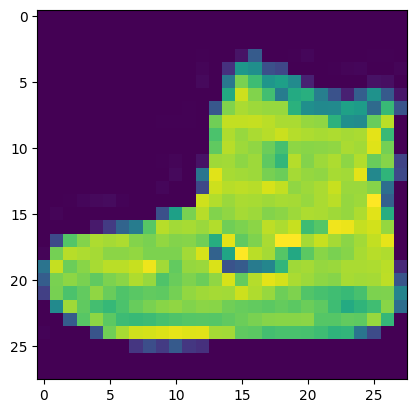

In [ ]:
plt.imshow(image.squeeze())  #squeeze is remove all one dim

Text(0.5, 1.0, 'Ankle boot')

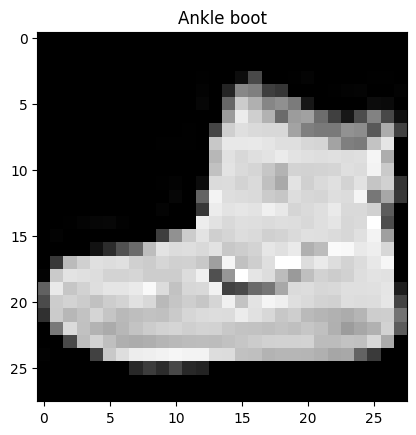

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')  #squeeze is remove all one dim
plt.title(class_names[label])

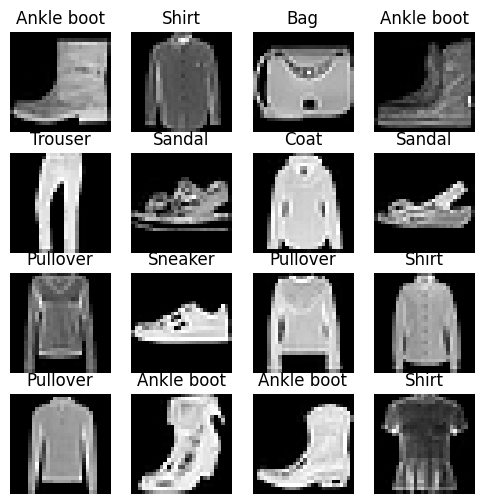

In [ ]:

# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(6, 6))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    #print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

### 2. Prepare DataLoader

In [ ]:
from torch.utils.data.dataloader import DataLoader
# Setup the batch size hyperparameter
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                               shuffle=True,
                               batch_size=BATCH_SIZE)
test_dataloader = DataLoader(dataset=test_data,
                               shuffle=False,
                               batch_size=BATCH_SIZE)

In [ ]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ec9b27abca0>, <torch.utils.data.dataloader.DataLoader object at 0x7ec9b27abc10>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


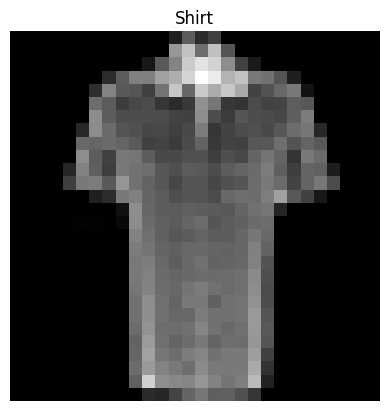

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


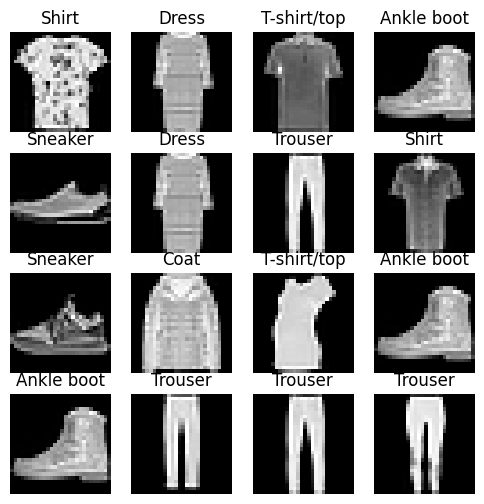

In [ ]:
# Show a sample
#torch.manual_seed(42)
fig = plt.figure(figsize=(6, 6))
rows, cols = 4,4
for i in range(1, rows*cols+1):

  random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
  img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### 3. Model 0: Build a baseline model

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f'shape, before flattening:{x.shape} --> [color channels, height, width]')
print(f'shape, after flattening:{output.shape} --> [color channels, height*width]')

shape, before flattening:torch.Size([1, 28, 28]) --> [color channels, height, width]
shape, after flattening:torch.Size([1, 784]) --> [color channels, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape :int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))
model_0.to("cpu") # keep model on CPU to begin with

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

#### 3.1 Setup loss, optimizer and evaluation metrics

In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

#### 3.2 Creating a function to time our experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
start_time = timer()
#code ....
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


4.8315000000798136e-05

#### 3.3 Creating a training loop and training a model on batches of data

In [ ]:
from tqdm import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss, train_acc = 0,0
  for batch, (image, label) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(image)
    loss = loss_fn(y_pred, label)
    acc = accuracy_fn(label, y_pred.argmax(dim=1))

    train_loss += loss
    train_acc +=acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    if batch % 400 == 0:
      print(f'Looked at {batch * len(image)}/{len(train_dataloader.dataset)} samples.')
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

#Testing
test_loss, test_acc = 0,0
model_0.eval()
with torch.no_grad():
  for image, label in test_dataloader:
    test_pred = model_0(image)

    test_loss += loss_fn(test_pred, label)
    test_acc += accuracy_fn(y_true=label, y_pred=test_pred.argmax(dim=1))

  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)
print(f'Train_loss:{train_loss:.4f} | Train_acc: {train_acc:.4f} | Test_loss:{test_loss:.4f}, Test_acc:{test_acc:.4f}')

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 20%|██        | 1/5 [00:08<00:33,  8.29s/it]

Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 40%|████      | 2/5 [00:16<00:24,  8.18s/it]

Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 60%|██████    | 3/5 [00:23<00:15,  7.81s/it]

Epoch: 3
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 80%|████████  | 4/5 [00:31<00:07,  7.92s/it]

Epoch: 4
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 5/5 [00:40<00:00,  8.12s/it]


Train_loss:0.4348 | Train_acc: 84.8950 | Test_loss:0.5083, Test_acc:83.0471
Train time on cpu: 41.657 seconds


In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0299, -0.0053,  ...,  0.0153,  0.0114,  0.0193],
                      [-0.0190, -0.0357,  0.0138,  ...,  0.0304,  0.0154,  0.0109],
                      [-0.0009,  0.0020,  0.0019,  ...,  0.0174, -0.0158,  0.0087],
                      ...,
                      [-0.0115,  0.0277, -0.0303,  ...,  0.0665,  0.0522,  0.0015],
                      [-0.0232,  0.0248,  0.0208,  ..., -0.1049, -0.0454, -0.0103],
                      [ 0.0174, -0.0150,  0.0015,  ..., -0.1392, -0.0901,  0.0079]])),
             ('layer_stack.1.bias',
              tensor([ 0.0206,  0.2644,  1.4105, -0.7405,  0.6653,  0.5110, -0.3880,  0.2235,
                      -0.0902,  1.1811])),
             ('layer_stack.2.weight',
              tensor([[ 0.3846, -0.5011, -0.1928,  0.4177,  0.4160,  0.7380, -0.2008, -0.3656,
                       -0.2622,  0.3408],
                      [-0.5083,  0.1656, -0.5449,  0.1668, -0.0621,  0.0052, -1.

#### 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),  #.item(), bcoz we find loss with logits
            "model_acc": acc}   # no need of item(), bcoz we compare labels

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5083374977111816,
 'model_acc': 83.04712460063898}

### 5. Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
!nvidia-smi

Sat Nov  4 05:40:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6. Model 1: Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),

        nn.Linear(in_features=input_shape, out_features= hidden_units),
        nn.ReLU(),

        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU(),
    )
  def forward(self, x : torch.Tensor):
    return self.layer_stack(x)

In [ ]:
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units = 10,
                              output_shape=len(class_names)).to(device)


In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

In [ ]:
def Training_step(model : torch.nn.Module,
                  data_loader : torch.utils.data.DataLoader,
                  loss_fn : torch.nn.Module,
                  accuracy_fn,
                  optimizer : torch.optim.Optimizer,
                  device : torch.device = device):
  train_loss, train_acc = 0,0
  model.to(device)
  model.train()
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model_1(X)

    loss = loss_fn(y_pred, y)
    acc = accuracy_fn(y_true= y, y_pred=y_pred.argmax(dim=1))

    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}")



In [ ]:
def Testing_step(model,
                 data_loader,
                 loss_fn,
                 accuracy_fn,
                 device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      # Send data to GPU
      X, y = X.to(device), y.to(device)
      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



In [ ]:
torch.manual_seed(42)
from tqdm.auto import tqdm
# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch}\n---------")
  Training_step(model_1,
                train_dataloader,
                loss_fn=loss_fn,
                accuracy_fn= accuracy_fn,
                optimizer=optimizer,
                device = device)

  Testing_step(model_1,
                test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn= accuracy_fn,
                device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.98248 | Train accuracy: 65.06
Test loss: 0.76060 | Test accuracy: 72.80%

Epoch: 1
---------
Train loss: 0.70366 | Train accuracy: 74.48
Test loss: 0.71731 | Test accuracy: 73.67%

Epoch: 2
---------
Train loss: 0.67375 | Train accuracy: 75.31
Test loss: 0.69170 | Test accuracy: 74.81%

Epoch: 3
---------
Train loss: 0.65698 | Train accuracy: 75.81
Test loss: 0.67231 | Test accuracy: 75.21%

Epoch: 4
---------
Train loss: 0.64793 | Train accuracy: 75.90
Test loss: 0.68253 | Test accuracy: 75.24%

Train time on cuda: 52.566 seconds


In [ ]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6825318336486816,
 'model_acc': 75.23961661341853}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5083374977111816,
 'model_acc': 83.04712460063898}

### 7. Model 2: Building a Convolutional Neural Network (CNN)

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        #print(x.shape)
        x = self.block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x



In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
print(image[0].shape)
print((image[0].squeeze().shape))
print(image[0].unsqueeze(dim=1).shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 1, 28, 28])


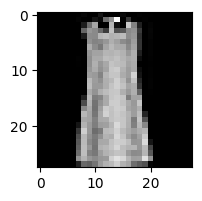

In [ ]:
plt.figure(figsize=(2,3))
plt.imshow(image[0].squeeze(), cmap='gray')

In [ ]:
model_2(image[0].unsqueeze(dim=1).to(device))

tensor([[ 0.0346, -0.0619,  0.0469, -0.0314, -0.0069,  0.0160, -0.0033, -0.0093,
          0.0279,  0.0074]], device='cuda:0', grad_fn=<AddmmBackward0>)

##7.1 Stepping through nn.Conv2d()

In [ ]:
torch.manual_seed(43)
img = torch.randn(size=(32,3,64,64))
test_image=img[0]
print(f'Shape of image : {img.shape}')
print(f'shape of test_image : {test_image.shape}')

Shape of image : torch.Size([32, 3, 64, 64])
shape of test_image : torch.Size([3, 64, 64])


In [ ]:
print(test_image[0,:,:].shape)
test_image[0,:1,:]

torch.Size([64, 64])


tensor([[-0.0166, -0.4668,  2.0909,  0.6149, -0.5621, -0.4143, -1.3001, -0.1012,
         -1.0999, -0.4687, -0.8400,  0.6868, -0.0678, -0.0886, -0.3124, -0.3552,
          0.7142,  0.4198, -1.7672, -0.4996,  0.3083, -0.2947, -0.7662, -0.9962,
          0.7781, -0.6856, -0.7326,  0.3004, -0.3630,  1.5822, -0.4430,  1.8462,
         -0.7115,  1.0425, -0.7618, -0.4830, -0.7771, -0.4484, -1.1668,  0.5006,
          1.3251, -1.1627, -2.1186,  0.5470, -1.1668, -1.0199,  1.6283,  0.3475,
         -0.1191, -1.5415,  0.6421,  1.5016, -0.1955,  0.7438,  1.3611,  0.7930,
          0.4777,  0.9248,  0.8841,  0.7809,  0.4664, -2.2619,  0.5374, -0.8002]])

In [ ]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
conv_layer(test_image).shape

torch.Size([10, 62, 62])

In [ ]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [ ]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [ ]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


### 7.2 Stepping through nn.MaxPool2d()

In [ ]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model_2

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

### 7.4 Training and testing model_2 using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

EPOCHS = 5
for epoch in range(EPOCHS):
  print(f'Epoch : {epoch} running...' )
  Training_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, optimizer=optimizer, device=device)
  Testing_step(model=model_2, data_loader= test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

Epoch : 0 running...
Train loss: 0.63160 | Train accuracy: 76.78
Test loss: 2.30231 | Test accuracy: 9.99%

Epoch : 1 running...
Train loss: 0.63160 | Train accuracy: 76.78
Test loss: 2.30231 | Test accuracy: 9.99%

Epoch : 2 running...
Train loss: 0.63160 | Train accuracy: 76.78
Test loss: 2.30231 | Test accuracy: 9.99%

Epoch : 3 running...
Train loss: 0.63160 | Train accuracy: 76.78
Test loss: 2.30231 | Test accuracy: 9.99%

Epoch : 4 running...
Train loss: 0.63160 | Train accuracy: 76.78
Test loss: 2.30231 | Test accuracy: 9.99%

Train time on cuda: 49.064 seconds


In [ ]:
model_2_results = eval_model(model=model_2, data_loader=test_dataloader, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023061752319336,
 'model_acc': 9.994009584664537}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.508337,83.047125
1,FashionMNISTModelV1,0.682532,75.239617
2,FashionMNISTModelV2,2.302306,9.994010


In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.508337,83.047125,41.656642
1,FashionMNISTModelV1,0.682532,75.239617,52.566382
2,FashionMNISTModelV2,2.302306,9.994010,49.064435


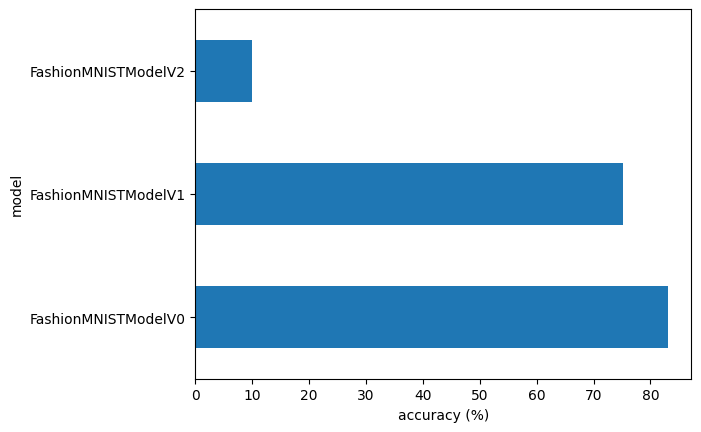

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [ ]:
!nvidia-smi

Sat Nov  4 05:46:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    26W /  70W |   1103MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(f'Shape of Test sample : {test_samples[0].shape} | Test_label : {test_labels[0]} | Test label in text : {class_names[test_labels[0]]}')


Shape of Test sample : torch.Size([1, 28, 28]) | Test_label : 9 | Test label in text : Ankle boot


In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:

            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)
            #print(pred_logit.shape)
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_0,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs

tensor([[2.6513e-04, 1.0260e-05, 2.8521e-05, 3.8215e-04, 8.0975e-07, 1.8952e-02,
         5.0230e-04, 1.0629e-02, 1.2672e-03, 9.6796e-01],
        [2.7609e-08, 7.1745e-09, 3.2838e-08, 5.0231e-08, 4.4549e-09, 1.0946e-03,
         6.9649e-08, 9.5875e-01, 3.3610e-04, 3.9821e-02],
        [4.0817e-02, 1.3985e-02, 5.5851e-01, 4.3284e-03, 5.9849e-02, 3.1232e-06,
         3.2014e-01, 3.8783e-06, 2.3640e-03, 7.2534e-07],
        [8.8869e-01, 1.9135e-05, 1.8259e-03, 5.5064e-04, 2.3748e-05, 1.2010e-09,
         1.0887e-01, 7.9320e-09, 1.7870e-05, 1.3710e-09],
        [3.1378e-04, 9.9818e-01, 7.2725e-05, 1.4192e-03, 1.1799e-05, 9.7397e-12,
         1.4448e-06, 5.1579e-07, 2.3640e-07, 2.9918e-08],
        [9.9939e-01, 3.1958e-07, 4.8984e-05, 6.6180e-06, 7.9988e-08, 2.5563e-16,
         5.4899e-04, 3.5226e-12, 3.5591e-07, 2.5757e-10],
        [3.3735e-03, 3.3774e-03, 8.5759e-03, 9.6072e-01, 1.5220e-02, 2.1513e-11,
         8.3438e-03, 5.8545e-07, 3.8572e-04, 5.8119e-08],
        [7.3996e-05, 6.6419

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 9, 4])

In [ ]:
pred_classes, test_labels

(tensor([9, 7, 2, 0, 1, 0, 3, 9, 4]), [9, 7, 2, 0, 1, 0, 4, 5, 4])

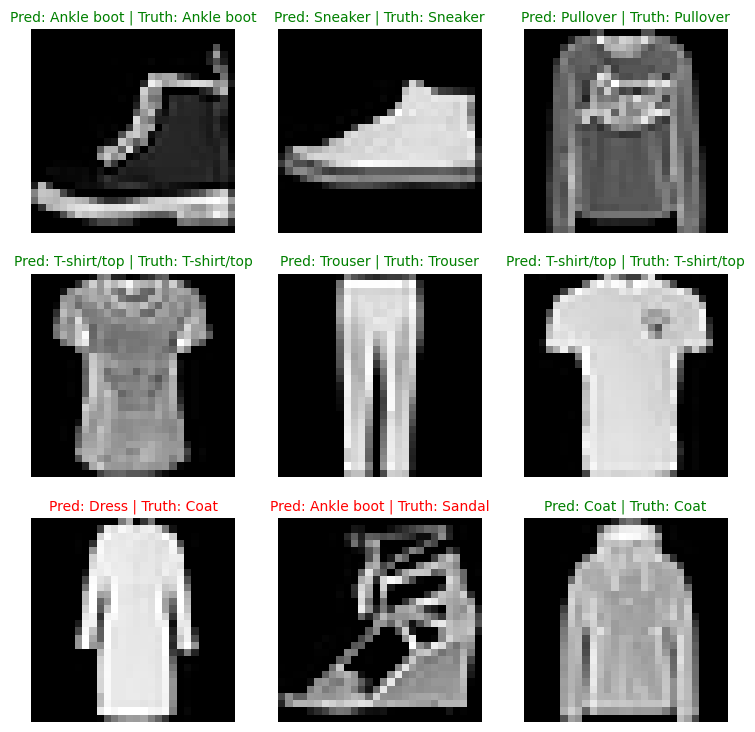

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);